## Подключение необходимых библиотек

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as matplotlib
print(f"Matplotlib: {matplotlib.__version__}")
print(f"Seaborn: {sns.__version__}")

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

Matplotlib: 3.3.4
Seaborn: 0.11.1


In [7]:
SEED = 42
FIGSIZE = (12,5)
FONTSIZE = 14

## Загрузка данных

In [8]:
PATH = '../data/'

try:
    X = pd.read_csv(PATH+'features.csv', index_col=0)
    y = pd.read_csv(PATH+'target.csv', index_col=0)
    inflation = pd.read_csv(PATH+'inflation.csv', index_col=0)
    print('All of the data has been loaded successfully!')
except Exception as err:
    print(repr(err))
print()

All of the data has been loaded successfully!



In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 2010 to 2022
Data columns (total 36 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   Численность постоянного населения                                                          13 non-null     float64
 1   Индекс  потребительских цен                                                                9 non-null      float64
 2   Валовой региональный продукт                                                               13 non-null     int64  
 3   Индекс промышленного производства                                                          13 non-null     float64
 4   Добыча полезных ископаемых                                                                 13 non-null     float64
 5   Обрабатывающие производства                    

In [10]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 2010 to 2020
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Налог на доходы физических лиц  11 non-null     float64
 1   Налог на прибыль организаций    11 non-null     float64
dtypes: float64(2)
memory usage: 264.0 bytes


In [11]:
X

,Численность постоянного населения,Индекс потребительских цен,Валовой региональный продукт,Индекс промышленного производства,Добыча полезных ископаемых,Обрабатывающие производства,Продукция сельского хозяйства,"Производство и распределение электроэнергии, газа и воды",железорудные окатыши,щебень и гравий,древесина необработанная,лесоматериалы продольно распиленные,"древесностружечные плиты, плиты OSB",бумага,"целлюлоза древесная и целлюлоза из прочих волокнистых материалов (сульфатная, сульфитная)",мешки бумажные,Картофель,Овощи,Скот и птица,Молоко,Яйца,Реализация алкогольной продукции организациями -производителями,Инвестиции в основной капитал,Ввод в эксплуатацию жилых домов,Оборот розничной торговли,Объем платных услуг населению,Фонд заработной платы,Реальные денежные доходы населения,Прибыль прибыльных организаций,Налогооблагаемая прибыль,Среднегодовая остаточная стоимость облагаемого имущества,Внешнеторговый оборот,Экспорт,Импорт,"Численность безработных, зарегистрированных в службах занятости",Уровень зарегистрированной безработицы (к численности экономически активного населения)
Год,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010,684.00,111.00,125000,98.00,100.00,NaN,NaN,95.00,6000,10500.00,NaN,NaN,NaN,955,NaN,300,77.50,22.80,12.50,71.20,54.90,NaN,17000,140.00,61300,18200,57500,96.00,2500.00,3500,95500,1235.00,1025.00,210.00,13.40,3.50
2011,680.50,106.50,118500,100.00,96.00,101.50,101.50,98.20,9000,8000.00,5500.00,690.00,80.00,980,1085.00,315,71.50,23.00,12.60,72.00,64.00,NaN,22920,135.00,62400,18500,57300,99.00,14000.00,20400,94300,1462.00,1222.00,240.00,13.10,3.50
2012,639.00,107.25,159000,101.80,102.00,102.00,96.00,100.00,10100,11000.00,5800.00,730.00,100.00,1015,1105.00,360,70.50,20.00,12.50,59.00,10.00,NaN,29320,179.00,76300,20400,63300,101.00,19700.00,22000,99000,1930.00,1580.00,350.00,10.50,2.82
2013,636.10,105.50,16300,101.50,101.50,101.00,100.70,102.40,10200,15000.00,5300.00,640.00,160.00,1000,1105.00,370,71.60,19.00,13.00,65.60,8.40,300.00,34220,202.80,85000,25650,71900,102.00,5500.00,21350,101000,2035.00,1530.00,505.00,8.70,2.40
2014,633.50,105.50,154300,100.00,100.00,98.00,NaN,100.00,10400,17500.00,5500.00,670.00,145.00,720,850.00,380,69.00,18.10,12.60,61.00,3.00,270.00,38270,205.00,95000,27600,81200,100.00,18000.00,14000,109500,1365.00,1120.00,245.00,7.70,2.33
2015,631.70,106.50,192000,100.50,100.00,100.50,NaN,99.00,10500,19200.00,6000.00,720.00,300.00,800,900.00,390,82.50,19.20,12.10,65.60,4.00,470.00,35270,220.00,101000,29800,81700,99.00,19300.00,12200,158000,1447.00,1257.00,190.00,7.70,2.41
2016,628.40,107.50,207100,100.00,100.00,100.00,NaN,99.00,10580,13600.00,6100.00,735.00,345.00,865,940.00,425,90.00,19.00,12.00,66.40,5.00,5.00,35660,245.00,104000,33000,80500,98.00,NaN,18200,148000,975.00,820.00,155.00,7.80,2.40
2017,626.20,106.00,220700,102.00,101.50,102.50,NaN,101.50,10660,16000.00,6300.00,800.00,380.00,920,995.00,460,90.30,18.80,5.90,72.50,5.60,426.50,36500,250.00,110600,32800,81700,99.50,22500.00,23600,135800,810.00,680.00,130.00,8.40,2.59
2018,623.30,104.00,249900,102.00,101.50,102.00,NaN,NaN,10905,18800.00,7000.00,900.00,406.00,985,1035.00,470,77.00,17.50,6.00,65.50,5.50,310.50,41470,265.00,117000,33400,83900,100.20,NaN,27260,148700,1046.80,799.60,247.20,6.98,2.16


In [12]:
y

,Налог на доходы физических лиц,Налог на прибыль организаций
Год,,
2010,7721.64,3980.21
2011,8449.95,6262.56
2012,9230.79,5279.89
2013,10112.98,2200.02
2014,10463.56,1837.84
2015,10131.38,3114.01
2016,10804.67,4280.04
2017,11136.96,4022.68
2018,12708.63,8128.88


Объединим признаки и целевой признак

In [14]:
df = pd.concat([X, y], axis=1)
df

,Численность постоянного населения,Индекс потребительских цен,Валовой региональный продукт,Индекс промышленного производства,Добыча полезных ископаемых,Обрабатывающие производства,Продукция сельского хозяйства,"Производство и распределение электроэнергии, газа и воды",железорудные окатыши,щебень и гравий,древесина необработанная,лесоматериалы продольно распиленные,"древесностружечные плиты, плиты OSB",бумага,"целлюлоза древесная и целлюлоза из прочих волокнистых материалов (сульфатная, сульфитная)",мешки бумажные,Картофель,Овощи,Скот и птица,Молоко,Яйца,Реализация алкогольной продукции организациями -производителями,Инвестиции в основной капитал,Ввод в эксплуатацию жилых домов,Оборот розничной торговли,Объем платных услуг населению,Фонд заработной платы,Реальные денежные доходы населения,Прибыль прибыльных организаций,Налогооблагаемая прибыль,Среднегодовая остаточная стоимость облагаемого имущества,Внешнеторговый оборот,Экспорт,Импорт,"Численность безработных, зарегистрированных в службах занятости",Уровень зарегистрированной безработицы (к численности экономически активного населения),Налог на доходы физических лиц,Налог на прибыль организаций
Год,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010,684.00,111.00,125000,98.00,100.00,NaN,NaN,95.00,6000,10500.00,NaN,NaN,NaN,955,NaN,300,77.50,22.80,12.50,71.20,54.90,NaN,17000,140.00,61300,18200,57500,96.00,2500.00,3500,95500,1235.00,1025.00,210.00,13.40,3.50,7721.64,3980.21
2011,680.50,106.50,118500,100.00,96.00,101.50,101.50,98.20,9000,8000.00,5500.00,690.00,80.00,980,1085.00,315,71.50,23.00,12.60,72.00,64.00,NaN,22920,135.00,62400,18500,57300,99.00,14000.00,20400,94300,1462.00,1222.00,240.00,13.10,3.50,8449.95,6262.56
2012,639.00,107.25,159000,101.80,102.00,102.00,96.00,100.00,10100,11000.00,5800.00,730.00,100.00,1015,1105.00,360,70.50,20.00,12.50,59.00,10.00,NaN,29320,179.00,76300,20400,63300,101.00,19700.00,22000,99000,1930.00,1580.00,350.00,10.50,2.82,9230.79,5279.89
2013,636.10,105.50,16300,101.50,101.50,101.00,100.70,102.40,10200,15000.00,5300.00,640.00,160.00,1000,1105.00,370,71.60,19.00,13.00,65.60,8.40,300.00,34220,202.80,85000,25650,71900,102.00,5500.00,21350,101000,2035.00,1530.00,505.00,8.70,2.40,10112.98,2200.02
2014,633.50,105.50,154300,100.00,100.00,98.00,NaN,100.00,10400,17500.00,5500.00,670.00,145.00,720,850.00,380,69.00,18.10,12.60,61.00,3.00,270.00,38270,205.00,95000,27600,81200,100.00,18000.00,14000,109500,1365.00,1120.00,245.00,7.70,2.33,10463.56,1837.84
2015,631.70,106.50,192000,100.50,100.00,100.50,NaN,99.00,10500,19200.00,6000.00,720.00,300.00,800,900.00,390,82.50,19.20,12.10,65.60,4.00,470.00,35270,220.00,101000,29800,81700,99.00,19300.00,12200,158000,1447.00,1257.00,190.00,7.70,2.41,10131.38,3114.01
2016,628.40,107.50,207100,100.00,100.00,100.00,NaN,99.00,10580,13600.00,6100.00,735.00,345.00,865,940.00,425,90.00,19.00,12.00,66.40,5.00,5.00,35660,245.00,104000,33000,80500,98.00,NaN,18200,148000,975.00,820.00,155.00,7.80,2.40,10804.67,4280.04
2017,626.20,106.00,220700,102.00,101.50,102.50,NaN,101.50,10660,16000.00,6300.00,800.00,380.00,920,995.00,460,90.30,18.80,5.90,72.50,5.60,426.50,36500,250.00,110600,32800,81700,99.50,22500.00,23600,135800,810.00,680.00,130.00,8.40,2.59,11136.96,4022.68
2018,623.30,104.00,249900,102.00,101.50,102.00,NaN,NaN,10905,18800.00,7000.00,900.00,406.00,985,1035.00,470,77.00,17.50,6.00,65.50,5.50,310.50,41470,265.00,117000,33400,83900,100.20,NaN,27260,148700,1046.80,799.60,247.20,6.98,2.16,12708.63,8128.88


In [19]:
TARGETS = ['Налог на доходы физических лиц', 'Налог на прибыль организаций']

In [15]:
df.iloc[:,:5]

,Численность постоянного населения,Индекс потребительских цен,Валовой региональный продукт,Индекс промышленного производства,Добыча полезных ископаемых
Год,,,,,
2010,684.00,111.00,125000,98.00,100.00
2011,680.50,106.50,118500,100.00,96.00
2012,639.00,107.25,159000,101.80,102.00
2013,636.10,105.50,16300,101.50,101.50
2014,633.50,105.50,154300,100.00,100.00
2015,631.70,106.50,192000,100.50,100.00
2016,628.40,107.50,207100,100.00,100.00
2017,626.20,106.00,220700,102.00,101.50
2018,623.30,104.00,249900,102.00,101.50


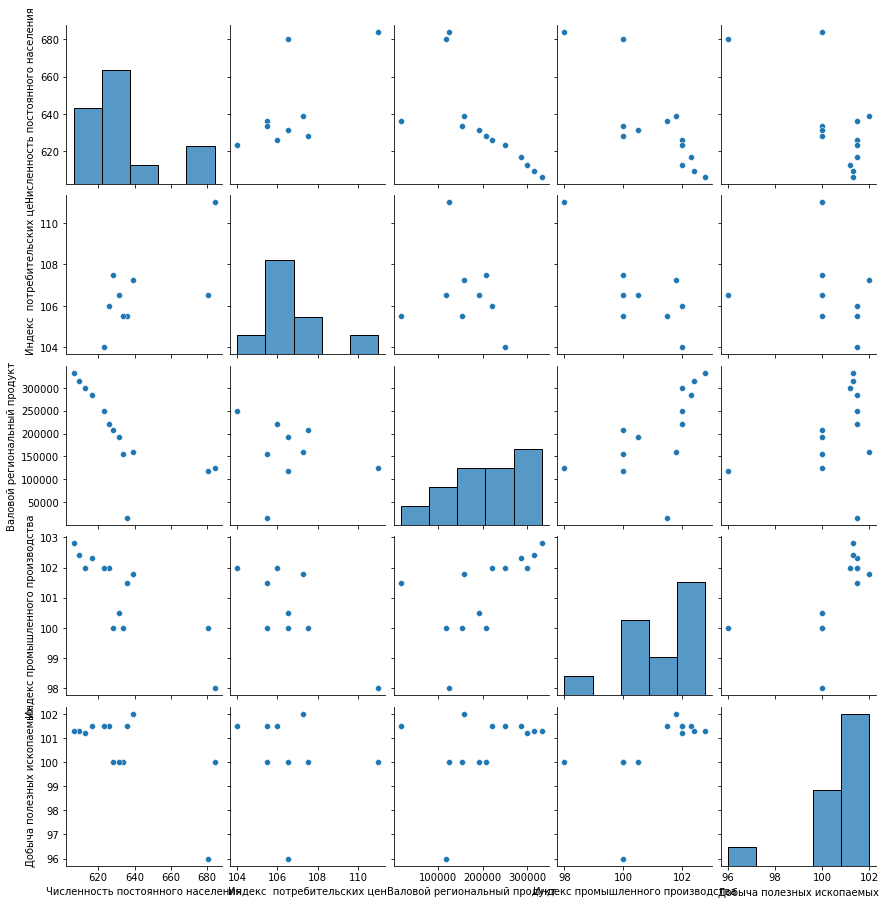

In [16]:
sns.pairplot(df.iloc[:,:5])

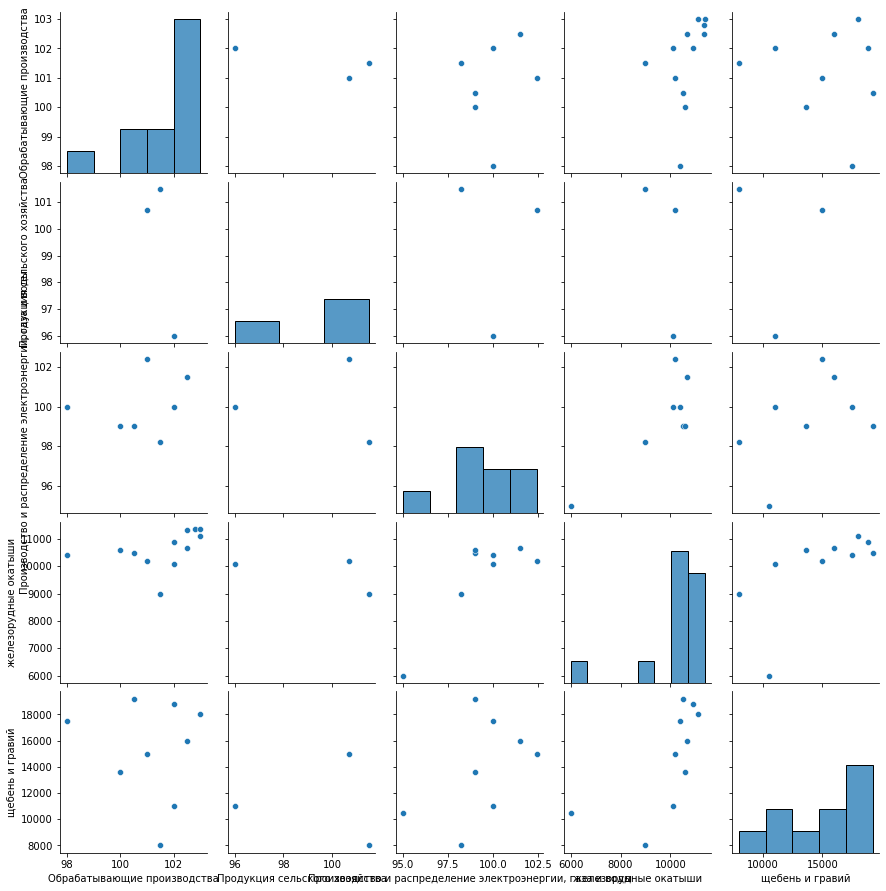

In [17]:
sns.pairplot(df.iloc[:,5:10])

In [20]:
max_corr_target0 = pd.concat([df.corr(method='pearson', min_periods=1).sort_values(by=TARGETS[0]).iloc[:5][TARGETS[0]],
           df.corr(method='pearson', min_periods=1).sort_values(by=TARGETS[0]).iloc[-6:-1][TARGETS[0]]])
print(TARGETS[0])
max_corr_target0

Налог на доходы физических лиц


Овощи                                                                                     -0.91
Численность безработных, зарегистрированных в службах занятости                           -0.87
Уровень зарегистрированной безработицы (к численности экономически активного населения)   -0.87
Численность постоянного населения                                                         -0.86
Скот и птица                                                                              -0.86
Объем платных услуг населению                                                              0.94
Инвестиции в основной капитал                                                              0.94
Фонд заработной платы                                                                      0.95
мешки бумажные                                                                             0.95
Оборот розничной торговли                                                                  0.97
Name: Налог на доходы физических лиц, dt

In [21]:
max_corr_target1 = pd.concat([df.corr(method='pearson', min_periods=1).sort_values(by=TARGETS[1]).iloc[:5][TARGETS[1]],
           df.corr(method='pearson', min_periods=1).sort_values(by=TARGETS[1]).iloc[-6:-1][TARGETS[1]]])
print(TARGETS[1])
max_corr_target1

Налог на прибыль организаций


Скот и птица                                                      -0.60
Производство и распределение электроэнергии, газа и воды          -0.36
Реализация алкогольной продукции организациями -производителями   -0.26
Импорт                                                            -0.23
Индекс  потребительских цен                                       -0.18
Валовой региональный продукт                                       0.58
бумага                                                             0.59
Обрабатывающие производства                                        0.69
лесоматериалы продольно распиленные                                0.69
древесина необработанная                                           0.74
Name: Налог на прибыль организаций, dtype: float64

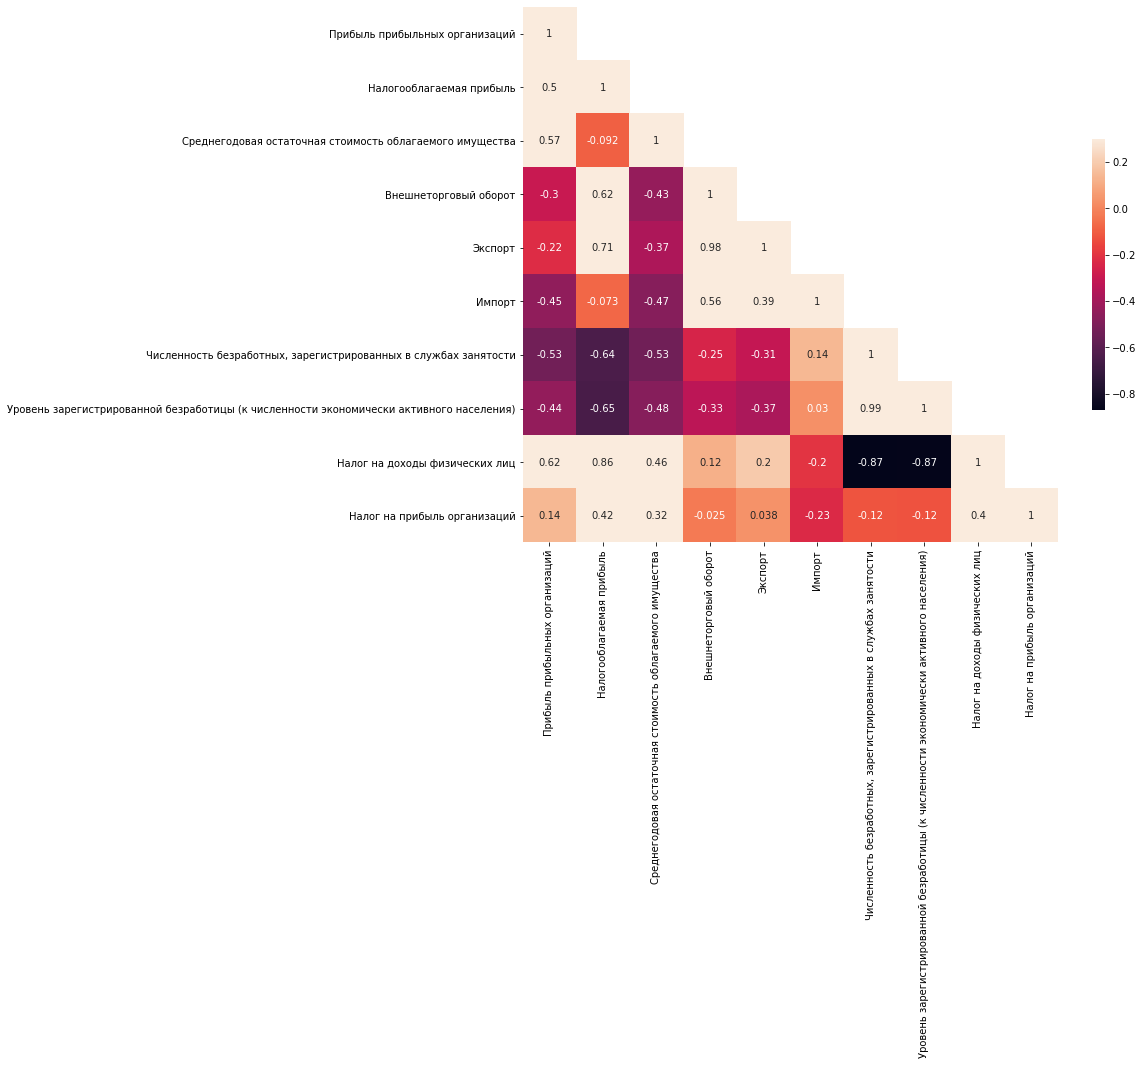

In [22]:
corrMatrix = df.iloc[:,-10:].corr(method='pearson', min_periods=1)
plt.figure(figsize=(12,10))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrMatrix, dtype=bool), k=1)
ax = sns.heatmap(corrMatrix, square=True, vmax=.3, annot=True, mask=mask, cbar_kws={"shrink": .5})
plt.show()